In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
from os import listdir,mkdir
from os.path import isfile, join,exists
import json
from sklearn.metrics import balanced_accuracy_score

In [17]:
final_folders2=['armraise','bicyclecrunch','birddog','curl','fly','legraise','overheadpress','pushup','squat','superman']
labels=['armraise','bicyclecrunch','birddog','curl','fly','legrais','overheadpress','pushup','squat','superman']
angle_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/angle'
positions_finalPath='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data/train/positions'
output_array_intialization=[0,0,0,0,0,0,0,0,0,0]
frame_size=1
drive_path='gdrive/MyDrive/EECE_5644_FINAL_PROJECT/data'
local_path='/Users/vikashmediboina/Documents/Exersises'
postion_rep_wise_data_path='postion_rep_wise_data_10_vedioes_each_exersise.xlsx'
angle_rep_wise_data_path='angle_rep_wise_data_10_vedioes_each_exersise.xlsx'
postion_data_path='postion_data_frame_size_100.xlsx'
angle_data_path='postion_data_frame_size_100.xlsx'
test_postion_rep_wise_data_path='test_postion_rep_wise_data.xlsx'
test_angle_rep_wise_data_path='test_angle_rep_wise_data.xlsx'
test_postion_data_path='test_postion_data_all.xlsx'
test_angle_data_path='test_angle_data_path.xlsx'

In [18]:
pd_rep_all_data=pd.read_excel(join(drive_path,postion_rep_wise_data_path))
# test_pd_rep_data=pd.read_excel(join(drive_path,))
pd_rep_all_data=pd_rep_all_data.drop(['Unnamed: 0'],axis=1)
pd_rep_all_data

,left_hip_X,left_hip_Y,left_knee_X,left_knee_Y,left_ankle_X,left_ankle_Y,right_hip_X,right_hip_Y,right_knee_X,right_knee_Y,...,left_wrist_Y,right_shoulder_X,right_shoulder_Y,right_elbow_X,right_elbow_Y,right_wrist_X,right_wrist_Y,rep_id,label,vedio_id
0,"[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[143, 143, 143, 143, 143, 143, 143, 143, 143, ...","[91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 9...","[169, 169, 169, 169, 169, 169, 169, 169, 169, ...","[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...","[196, 196, 196, 196, 196, 196, 196, 196, 196, ...","[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 83, 8...","[145, 145, 145, 145, 145, 145, 145, 145, 145, ...","[83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 8...","[171, 171, 171, 171, 171, 171, 171, 171, 171, ...",...,"[140, 140, 138, 133, 124, 113, 103, 95, 88, 84...","[78, 78, 78, 78, 78, 77, 77, 77, 77, 76, 76, 7...","[108, 108, 108, 108, 107, 106, 106, 106, 106, ...","[73, 73, 75, 77, 80, 82, 83, 84, 83, 83, 82, 8...","[128, 128, 127, 125, 121, 116, 110, 105, 101, ...","[76, 77, 80, 86, 92, 96, 97, 98, 97, 96, 96, 9...","[144, 144, 143, 139, 130, 119, 109, 100, 94, 9...",0,armraise,0
1,"[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[143, 143, 143, 143, 143, 143, 143, 143, 143, ...","[91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 9...","[169, 169, 169, 169, 169, 169, 169, 169, 169, ...","[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...","[196, 196, 196, 196, 196, 196, 196, 196, 196, ...","[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 8...","[145, 145, 145, 145, 145, 145, 145, 145, 145, ...","[83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 8...","[171, 171, 171, 171, 171, 171, 171, 171, 171, ...",...,"[140, 140, 140, 139, 137, 133, 127, 119, 112, ...","[78, 78, 78, 78, 78, 78, 78, 77, 77, 77, 77, 7...","[108, 108, 108, 108, 108, 108, 107, 107, 106, ...","[73, 73, 74, 75, 77, 79, 82, 83, 85, 85, 86, 8...","[128, 128, 128, 128, 127, 125, 122, 118, 114, ...","[78, 78, 79, 81, 85, 89, 93, 97, 99, 100, 100,...","[145, 145, 145, 144, 142, 137, 131, 123, 116, ...",0,armraise,0
2,"[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[143, 143, 143, 143, 143, 143, 143, 143, 143, ...","[91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 9...","[169, 169, 169, 169, 169, 169, 169, 169, 169, ...","[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...","[196, 196, 196, 196, 196, 196, 196, 196, 196, ...","[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 8...","[145, 145, 145, 145, 145, 145, 145, 145, 145, ...","[83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 8...","[171, 171, 171, 171, 171, 171, 171, 171, 171, ...",...,"[142, 142, 141, 138, 133, 126, 119, 111, 104, ...","[78, 78, 78, 78, 78, 77, 77, 77, 77, 77, 77, 7...","[108, 108, 108, 108, 108, 107, 106, 106, 106, ...","[68, 68, 69, 70, 72, 74, 76, 77, 77, 77, 77, 7...","[125, 125, 125, 124, 121, 117, 112, 107, 103, ...","[67, 67, 69, 72, 76, 81, 84, 86, 86, 86, 86, 8...","[142, 141, 141, 138, 132, 124, 114, 104, 96, 8...",0,armraise,0
3,"[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[143, 143, 143, 143, 143, 143, 143, 143, 143, ...","[91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 9...","[169, 169, 169, 169, 169, 169, 169, 169, 169, ...","[90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 9...","[196, 196, 196, 196, 196, 196, 196, 196, 196, ...","[84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 84, 8...","[145, 145, 145, 145, 145, 145, 145, 145, 145, ...","[83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 8...","[171, 171, 171, 171, 171, 171, 171, 171, 171, ...",...,"[142, 142, 142, 141, 140, 136, 131, 125, 118, ...","[78, 78, 78, 78, 78, 78, 78, 77, 77, 77, 77, 7...","[108, 108, 108, 108, 108, 108, 107, 107, 106, ...","[72, 72, 73, 74, 75, 77, 79, 81, 82, 83, 84, 8...","[127, 127, 128, 127, 127, 125, 123, 119, 115, ...","[73, 73, 74, 76, 79, 83, 88, 91, 94, 96, 96, 9...","[144, 144, 144, 144, 142, 139, 133, 126, 118, ...",0,armraise,0
4,"[92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 9...","[143, 143, 143, 143, 143, 143, 143, 143, 143, ...","[91, 91, 91, 91, 91, 91, 91, 

In [19]:
for key in pd_rep_all_data:
    pd_rep_all_data[key]=pd_rep_all_data[key].astype(object)

In [20]:
y=pd_rep_all_data['label']
x=pd_rep_all_data.drop(labels=['label','rep_id','vedio_id'],axis=1)

In [21]:
!pip install dtaidistance

from dtaidistance.dtw_visualisation import plot_warp,plot_warpingpaths
from dtaidistance import dtw

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.04, random_state=23)
# X_train, X_test, y_train, y_test

In [28]:
def dtw_distance(s1,s2):
    # print(np.asarray(s1[1:-1].split(', ')))
    d2, paths = dtw.warping_paths(np.asarray(s1[1:-1].split(', ')).astype(int), np.asarray(s2[1:-1].split(', ')).astype(int), window=2)
#     best_path = dtw.best_path(paths)
    return d2

In [29]:
def distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += dtw_distance(row1[i], row2[i])
    return (distance)

In [30]:
def predict_knn(X_train,y_train, X,n_neighbors):
        
        # initialize prediction_knn as empty list
        prediction_knn = []

        # # initialize euclidian_distances as empty list
        # euclidian_distances = []

        for test_row_index,test in X.iterrows():  # Main loop iterating through len(X)
            print(test_row_index)
            # initialize euclidian_distances as empty list
            distances = []
            train_row_indexs=[]
            for train_row_index,train in X_train.iterrows():
#                 print(test,row)
                # for every row in X_train, find eucl_distance to X using
                # euclidean_distance() and append to euclidian_distances list
                dist = distance(train,test)
                distances.append(dist)
                train_row_indexs.append(train_row_index)
            # sort euclidian_distances in ascending order, and retain only k
            # neighbors as specified in n_neighbors (n_neighbors = k)
            neighbors = np.array(distances).argsort()[: n_neighbors]
#             print(neighbors,distances)
            # initialize dict to count class occurrences in y_train
            count_neighbors = {}

            for val in neighbors:
#                 print(val)
                if y_train[train_row_indexs[val]] in count_neighbors:
                    count_neighbors[y_train[train_row_indexs[val]]] += 1
                else:
                    count_neighbors[y_train[train_row_indexs[val]]] = 1

            # max count labels to prediction_knn
            prediction_knn.append(max(count_neighbors, key=count_neighbors.get))

        return prediction_knn

300
26
567
14
155
207
211
319
440
517
139
143
124
29
484
24
222
64
257
476
45
445
451
501
145
1.0


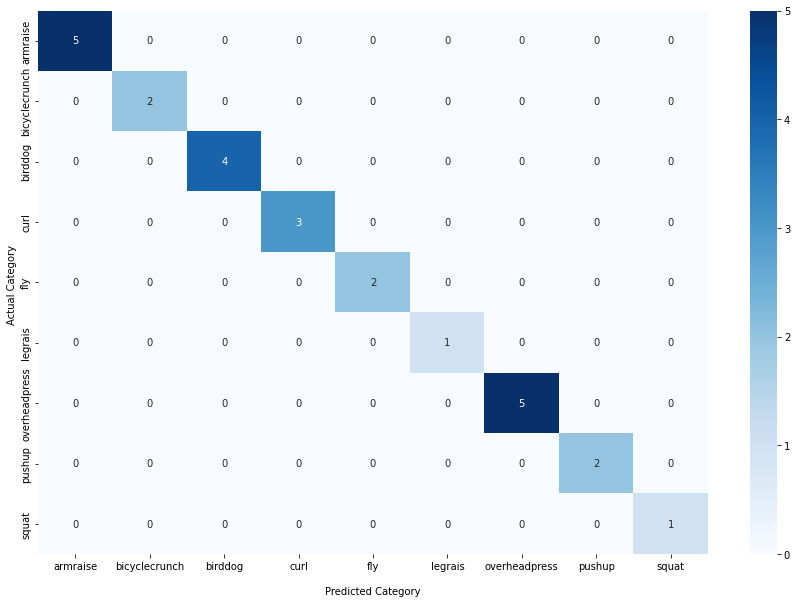

In [31]:
prediction = predict_knn(X_train,y_train, X_test, 3)

print(balanced_accuracy_score(y_test, prediction))
cf_matrix = confusion_matrix(y_test, prediction)
plt.figure(figsize=(15,10))
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt="d")
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

      ## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
prediction

In [ ]:
y_test